In [1]:
from boto.s3.connection import S3Connection
import os
import json
import boto.s3
import sys
import datetime
import seaborn as sns
from boto.s3.key import Key
from pprint import pprint
import pandas as pd
import urllib
import csv
import io
import requests
import time
import json
import datetime
from pprint import pprint
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rawdataspecificrows= pd.read_csv("train_2017.csv")
rawdataspecificrows.shape
rawdataspecificrows.head(2)

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01


In [3]:
rawdataspecificrows.head(2)

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01


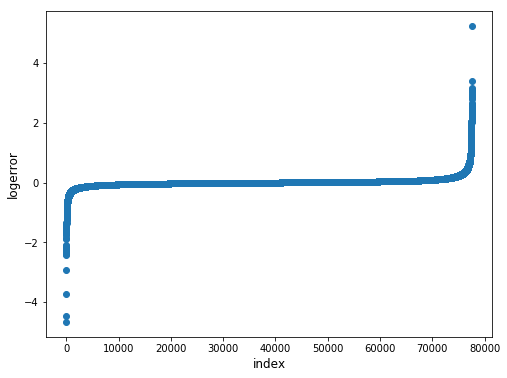

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(range(rawdataspecificrows.shape[0]), np.sort(rawdataspecificrows.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

In [5]:
color = sns.color_palette()
rawdataspecificrows['transaction_month'] = rawdataspecificrows['transactiondate']

cnt_srs = rawdataspecificrows['transaction_month'].value_counts()
plt.figure(figsize=(365,100))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Days of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

In [6]:
(rawdataspecificrows['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    77218
2      193
3        3
Name: parcelid, dtype: int64

In [23]:
prop_df = pd.read_csv("properties_2017.csv")
prop_df.shape

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)

In [24]:
prop_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [25]:
prop_df.isnull().sum()

parcelid                              0
airconditioningtypeid           2169855
architecturalstyletypeid        2979156
basementsqft                    2983590
bathroomcnt                        2957
bedroomcnt                         2945
buildingclasstypeid             2972486
buildingqualitytypeid           1043822
calculatedbathnbr                117156
decktypeid                      2967838
finishedfloor1squarefeet        2781459
calculatedfinishedsquarefeet      45097
finishedsquarefeet12             264431
finishedsquarefeet13            2977546
finishedsquarefeet15            2795032
finishedsquarefeet50            2781459
finishedsquarefeet6             2963735
fips                               2932
fireplacecnt                    2672093
fullbathcnt                      117156
garagecarcnt                    2094209
garagetotalsqft                 2094209
hashottuborspa                  2935155
heatingorsystemtypeid           1116053
latitude                           2932


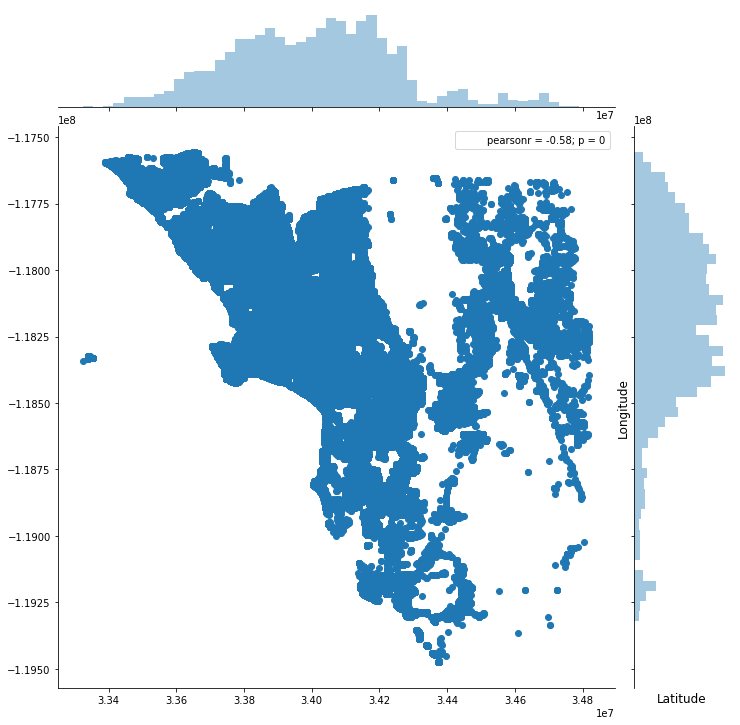

In [26]:
plt.figure(figsize=(12,12))
sns.jointplot(x=prop_df.latitude.values, y=prop_df.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

In [42]:
train_df = pd.merge(rawdataspecificrows, prop_df, on='parcelid', how='left')
train_df.head()

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,14297519,0.025595,2017-01-01,2017-01-01,NaN,NaN,NaN,3.5,4.0,NaN,...,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13
1,17052889,0.055619,2017-01-01,2017-01-01,NaN,NaN,NaN,1.0,2.0,NaN,...,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13
2,14186244,0.005383,2017-01-01,2017-01-01,NaN,NaN,NaN,2.0,3.0,NaN,...,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13
3,12177905,-0.103410,2017-01-01,2017-01-01,NaN,NaN,NaN,3.0,4.0,NaN,...,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13
4,10887214,0.006940,2017-01-01,2017-01-01,1.0,NaN,NaN,3.0,3.0,NaN,...,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13


In [27]:
pd.options.display.max_rows = 65

dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,parcelid,int64
1,logerror,float64
2,transactiondate,object
3,transaction_month,object
4,airconditioningtypeid,float64
5,architecturalstyletypeid,float64
6,basementsqft,float64
7,bathroomcnt,float64
8,bedroomcnt,float64
9,buildingclasstypeid,float64


In [28]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,1
1,float64,53
2,object,7


In [29]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_df.shape[0]
missing_df.ix[missing_df['missing_ratio']>0.99]

    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,column_name,missing_count,missing_ratio
5,architecturalstyletypeid,77406,0.997333
6,basementsqft,77563,0.999356
9,buildingclasstypeid,77598,0.999807
12,decktypeid,76999,0.992089
16,finishedsquarefeet13,77571,0.999459
19,finishedsquarefeet6,77227,0.995027
32,pooltypeid10,77148,0.994009
44,storytypeid,77563,0.999356
46,typeconstructiontypeid,77390,0.997127
49,yardbuildingsqft26,77543,0.999098


In [43]:
train_df.drop(['fireplaceflag','basementsqft','buildingclasstypeid','decktypeid','finishedsquarefeet13','yardbuildingsqft26','typeconstructiontypeid','storytypeid','finishedsquarefeet6'],axis=1,inplace=True)
train_df.drop(['taxdelinquencyflag','propertyzoningdesc','propertycountylandusecode','hashottuborspa','transactiondate','transaction_month'],axis=1,inplace=True)
train_df.drop(['pooltypeid10'],axis=1,inplace=True)
train_df.drop(['architecturalstyletypeid'],axis=1,inplace=True)
print('ok')

ok


In [104]:

print(train_df.shape)
train_df.to_csv('value2.csv',mode='a',encoding='utf-8',index=False)

(77613, 44)


In [45]:
pd.options.display.max_rows = 65

dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,parcelid,int64
1,logerror,float64
2,airconditioningtypeid,float64
3,bathroomcnt,float64
4,bedroomcnt,float64
5,buildingqualitytypeid,float64
6,calculatedbathnbr,float64
7,finishedfloor1squarefeet,float64
8,calculatedfinishedsquarefeet,float64
9,finishedsquarefeet12,float64


In [46]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,1
1,float64,43


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


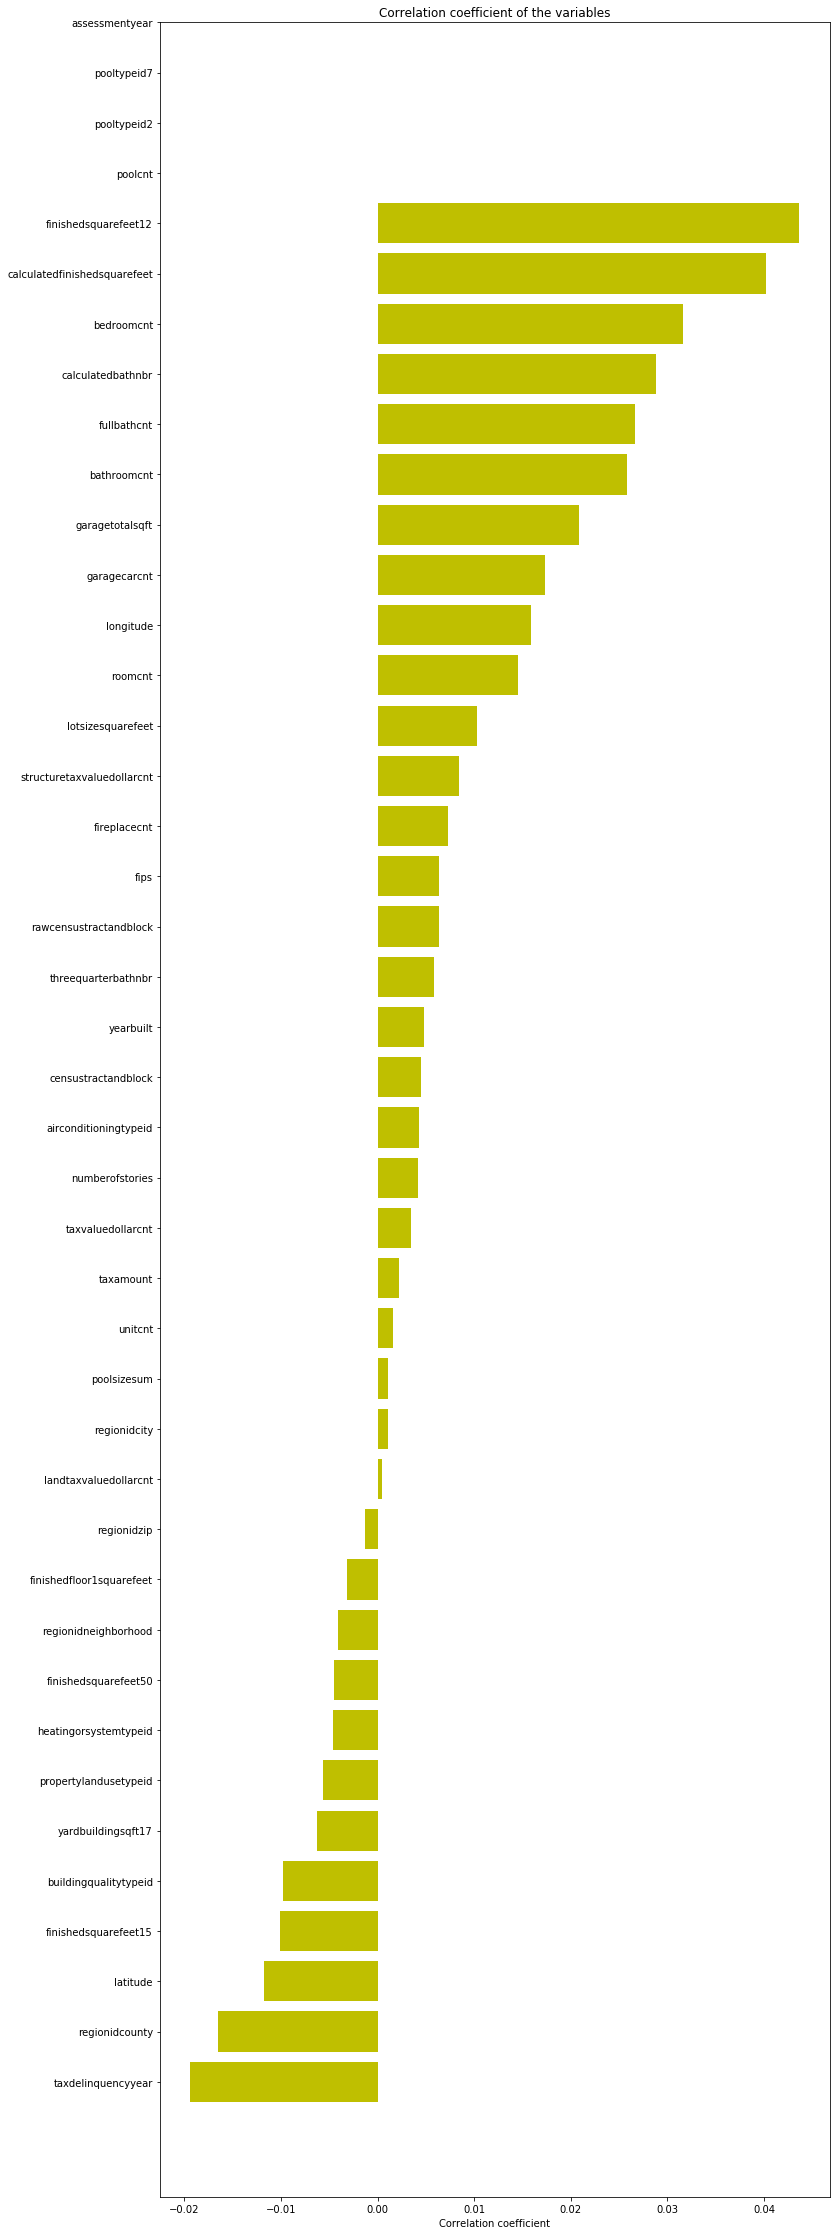

In [47]:
# Let us just impute the missing values with mean values to compute correlation coefficients #
mean_values = train_df.mean(axis=0)
train_df_new = train_df.fillna(mean_values, inplace=True)

# Now let us look at the correlation coefficient of each of these variables #
x_cols = [col for col in train_df_new.columns if col not in ['logerror'] if train_df_new[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_df_new[col].values, train_df_new.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()

In [48]:
corr_df_sel = corr_df.ix[(corr_df['corr_values']>0.02) | (corr_df['corr_values'] < -0.01)]
corr_df_sel

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,col_labels,corr_values
40,taxdelinquencyyear,-0.019361
26,regionidcounty,-0.016475
16,latitude,-0.011713
8,finishedsquarefeet15,-0.010099
14,garagetotalsqft,0.020888
1,bathroomcnt,0.025788
12,fullbathcnt,0.026632
4,calculatedbathnbr,0.028789
2,bedroomcnt,0.031603
6,calculatedfinishedsquarefeet,0.040233


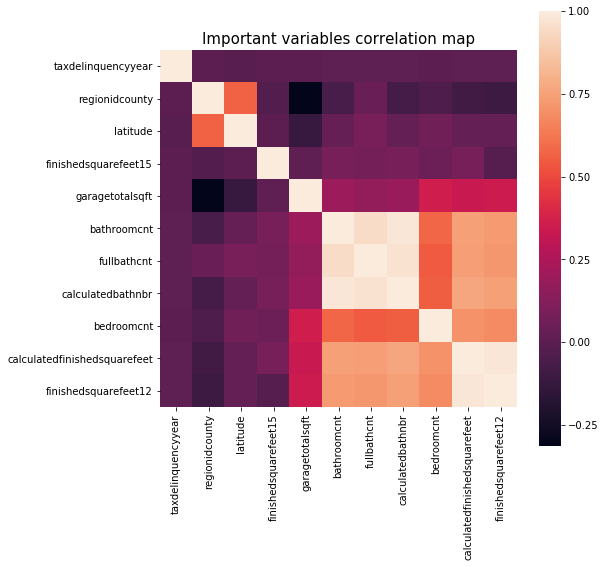

In [49]:
cols_to_use = corr_df_sel.col_labels.tolist()

temp_df = train_df[cols_to_use]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

In [50]:
train_df.to_csv('midterm_2017.csv',mode='a',encoding='utf-8',index=False)

In [51]:
form2017= pd.read_csv("midterm_2017.csv")
form2016= pd.read_csv("midterm_2016.csv")
combine_data = pd.merge(form2016, form2017, on='parcelid', suffixes=('_2016','_2017'))
combine_data.head()

,parcelid,logerror_2016,airconditioningtypeid_2016,bathroomcnt_2016,bedroomcnt_2016,buildingqualitytypeid_2016,calculatedbathnbr_2016,finishedfloor1squarefeet_2016,calculatedfinishedsquarefeet_2016,finishedsquarefeet12_2016,...,yardbuildingsqft17_2017,yearbuilt_2017,numberofstories_2017,structuretaxvaluedollarcnt_2017,taxvaluedollarcnt_2017,assessmentyear_2017,landtaxvaluedollarcnt_2017,taxamount_2017,taxdelinquencyyear_2017,censustractandblock_2017
0,14366692,-0.1684,1.816372,3.5,4.0,5.565407,3.5,1347.974037,2263.0,2263.0,...,305.460928,2014.0,1.434286,346458.0,974900.0,2016.0,628442.0,10153.02,14.088276,6.049667e+13
1,10854446,0.3825,1.816372,2.0,2.0,7.000000,2.0,1347.974037,1417.0,1417.0,...,305.460928,1954.0,1.434286,56240.0,107569.0,2016.0,51329.0,1443.69,14.088276,6.037141e+13
2,11188425,-0.0747,1.000000,2.0,2.0,4.000000,2.0,1347.974037,1302.0,1302.0,...,305.460928,1986.0,1.434286,180714.0,241629.0,2016.0,60915.0,3895.76,14.088276,6.037910e+13
3,11624877,-0.0294,1.000000,2.0,2.0,1.000000,2.0,1347.974037,1422.0,1422.0,...,305.460928,1981.0,1.434286,202000.0,673000.0,2016.0,471000.0,8048.18,14.088276,6.037269e+13
4,13980837,-0.0253,1.816372,3.0,4.0,5.565407,3.0,1347.974037,2501.0,2501.0,...,305.460928,1961.0,1.000000,180033.0,1530861.0,2016.0,1350828.0,16414.54,14.088276,6.059063e+13


In [52]:
combine_data.to_csv('combine2016^2017.csv',mode='a',encoding='utf-8',index=False)

In [60]:
#rawdata.to_csv('wrangleddata.csv', index=False)
import boto3
from botocore.client import Config
from boto.s3.connection import S3Connection

s3 = boto3.resource('s3')
for bucket in s3.buckets.all():
    print(bucket.name)

with open('s3.json') as data_file:    
    data = json.load(data_file)
# secret keys 

AWSAccess1=data["AWSAccess"]
AWSSecret1=data["AWSSecret"]
    
#Connection variables

c = boto.connect_s3(AWSAccess1, AWSSecret1)
conn = S3Connection(AWSAccess1, AWSSecret1)    
bucket = c.get_bucket('zillowdata')
b = c.get_bucket(bucket, validate=False)
 

#
BUCKET_NAME ='zillowdata'
FILE_NAME='midterm_2017.csv'
data = open(FILE_NAME, 'rb')

s3.Bucket(BUCKET_NAME).put_object(Key=FILE_NAME, Body=data,ACL='public-read')


print('successfully uploaded to s3')

pleasepass
pleasepassokkk
zhaomengqi8000
zillowdata
successfully uploaded to s3


In [61]:
#rawdata.to_csv('wrangleddata.csv', index=False)
import boto3
from botocore.client import Config
from boto.s3.connection import S3Connection

s3 = boto3.resource('s3')
for bucket in s3.buckets.all():
    print(bucket.name)

with open('s3.json') as data_file:    
    data = json.load(data_file)
# secret keys 

AWSAccess1=data["AWSAccess"]
AWSSecret1=data["AWSSecret"]
    
#Connection variables

c = boto.connect_s3(AWSAccess1, AWSSecret1)
conn = S3Connection(AWSAccess1, AWSSecret1)    
bucket = c.get_bucket('zillowdata')
b = c.get_bucket(bucket, validate=False)
 

#
BUCKET_NAME ='zillowdata'
FILE_NAME='midterm_2016.csv'
data = open(FILE_NAME, 'rb')

s3.Bucket(BUCKET_NAME).put_object(Key=FILE_NAME, Body=data,ACL='public-read')


print('successfully uploaded to s3')

pleasepass
pleasepassokkk
zhaomengqi8000
zillowdata
successfully uploaded to s3


In [107]:
#rawdata.to_csv('wrangleddata.csv', index=False)
import boto3
from botocore.client import Config
from boto.s3.connection import S3Connection

s3 = boto3.resource('s3')
for bucket in s3.buckets.all():
    print(bucket.name)

with open('s3.json') as data_file:    
    data = json.load(data_file)
# secret keys 

AWSAccess1=data["AWSAccess"]
AWSSecret1=data["AWSSecret"]
    
#Connection variables

c = boto.connect_s3(AWSAccess1, AWSSecret1)
conn = S3Connection(AWSAccess1, AWSSecret1)    
bucket = c.get_bucket('zillowdata')
b = c.get_bucket(bucket, validate=False)
 

#
BUCKET_NAME ='zillowdata'
FILE_NAME='combine2016^2017.csv'
data = open(FILE_NAME, 'rb')

s3.Bucket(BUCKET_NAME).put_object(Key=FILE_NAME, Body=data,ACL='public-read')


print('successfully uploaded to s3')

pleasepass
pleasepassokkk
zhaomengqi8000
zillowdata
successfully uploaded to s3


In [63]:
rawdataspecificrows= pd.read_csv("midterm_2017.csv")
rawdataspecificrows.head(5)

,parcelid,logerror,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,...,yardbuildingsqft17,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
0,14297519,0.025595,1.812013,3.5,4.0,6.533779,3.5,1366.165314,3100.0,3100.0,...,305.460928,1998.0,1.434286,485713.0,1023282.0,2016.0,537569.0,11013.72,14.088276,6.059063e+13
1,17052889,0.055619,1.812013,1.0,2.0,6.533779,1.0,1465.000000,1465.0,1465.0,...,305.460928,1967.0,1.000000,88000.0,464000.0,2016.0,376000.0,5672.48,14.088276,6.111001e+13
2,14186244,0.005383,1.812013,2.0,3.0,6.533779,2.0,1366.165314,1243.0,1243.0,...,305.460928,1962.0,1.000000,85289.0,564778.0,2016.0,479489.0,6488.30,14.088276,6.059022e+13
3,12177905,-0.103410,1.812013,3.0,4.0,8.000000,3.0,1366.165314,2376.0,2376.0,...,305.460928,1970.0,1.434286,108918.0,145143.0,2016.0,36225.0,1777.51,14.088276,6.037300e+13
4,10887214,0.006940,1.000000,3.0,3.0,8.000000,3.0,1366.165314,1312.0,1312.0,...,305.460928,1964.0,1.434286,73681.0,119407.0,2016.0,45726.0,1533.89,14.088276,6.037124e+13


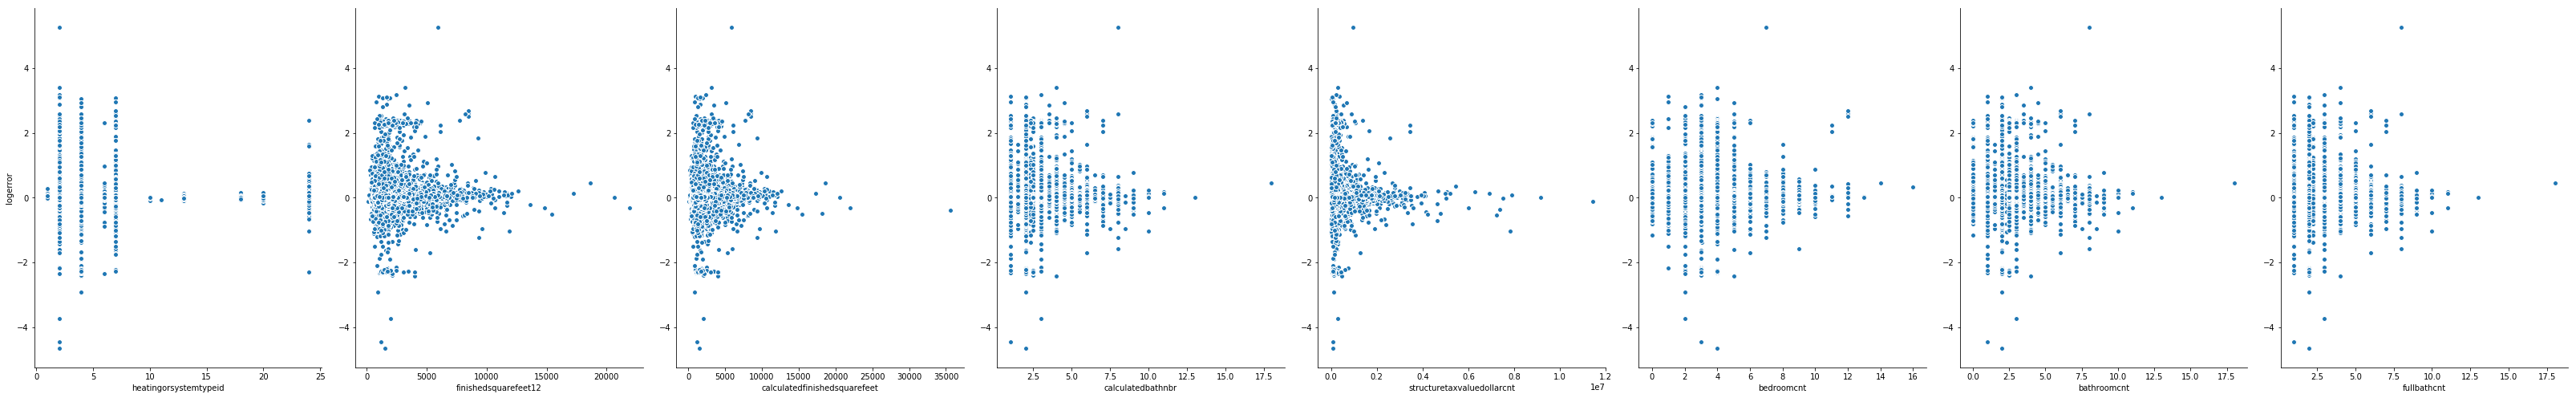

In [64]:
# visualize the relationship between the features and the response using scatterplots  
sns.pairplot(rawdataspecificrows, x_vars=['heatingorsystemtypeid','finishedsquarefeet12','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt'], y_vars='logerror', size=7, aspect=0.8)  
plt.show()

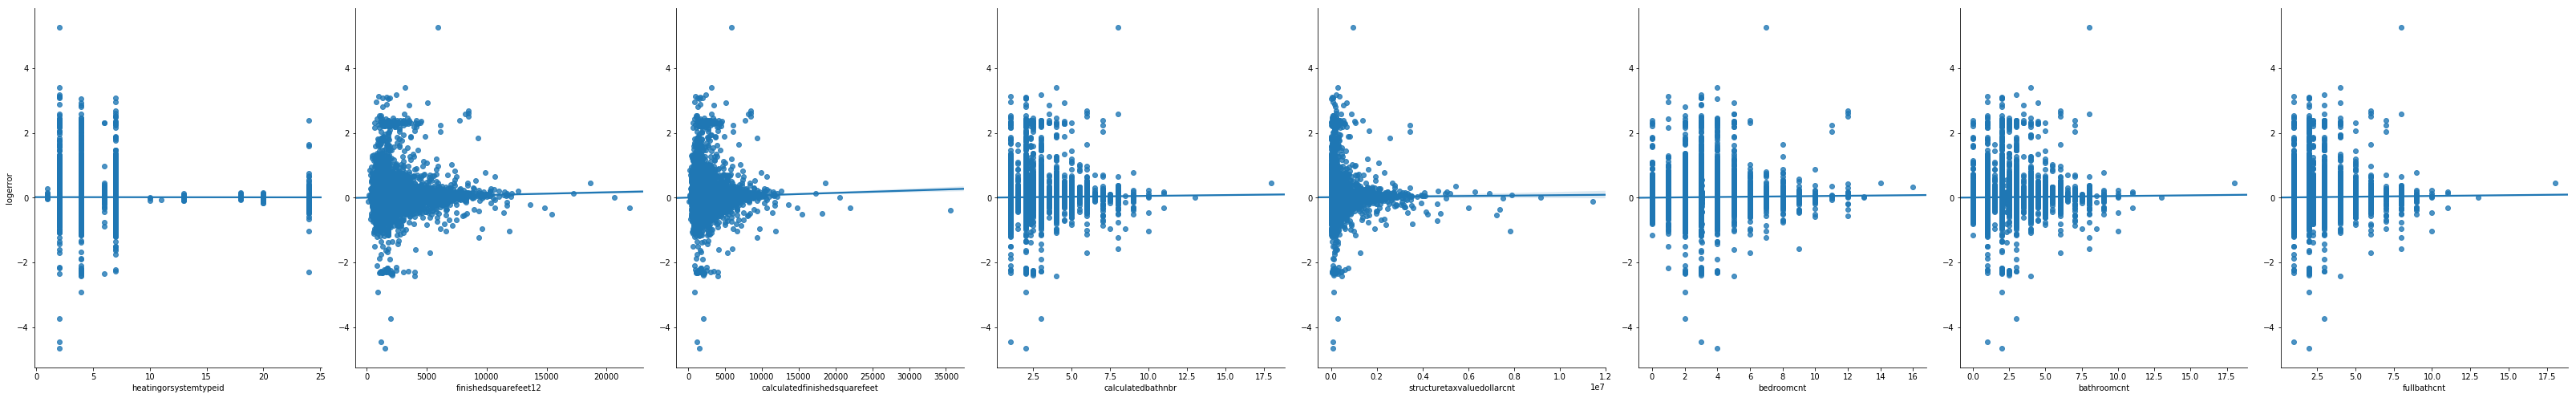

In [65]:
# visualize the relationship between the features and the response using scatterplots  
sns.pairplot(rawdataspecificrows, x_vars=['heatingorsystemtypeid','finishedsquarefeet12','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt'], y_vars='logerror', size=7, aspect=0.8, kind='reg')  
plt.show()

In [66]:
feature_cols=['taxdelinquencyyear','regionidcounty','latitude','garagetotalsqft','finishedsquarefeet15','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = rawdataspecificrows[feature_cols] 
X.head(5)

,taxdelinquencyyear,regionidcounty,latitude,garagetotalsqft,finishedsquarefeet15,calculatedfinishedsquarefeet,calculatedbathnbr,structuretaxvaluedollarcnt,bedroomcnt,bathroomcnt,fullbathcnt
0,14.088276,1286.0,33634931.0,633.000000,2354.491245,3100.0,3.5,485713.0,4.0,3.5,3.0
1,14.088276,2061.0,34449266.0,0.000000,2354.491245,1465.0,1.0,88000.0,2.0,1.0,1.0
2,14.088276,1286.0,33886168.0,440.000000,2354.491245,1243.0,2.0,85289.0,3.0,2.0,2.0
3,14.088276,3101.0,34245180.0,350.047061,2354.491245,2376.0,3.0,108918.0,4.0,3.0,3.0
4,14.088276,3101.0,34185120.0,350.047061,2354.491245,1312.0,3.0,73681.0,3.0,3.0,3.0


In [67]:
Y = rawdataspecificrows.logerror
print(Y.head(5))

from sklearn.cross_validation import train_test_split  
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)  
print (X_train.shape)  
print (Y_train.shape)  
print (X_test.shape)  
print (Y_test.shape)

0    0.025595
1    0.055619
2    0.005383
3   -0.103410
4    0.006940
Name: logerror, dtype: float64
(58209, 11)
(58209,)
(19404, 11)
(19404,)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [68]:
from sklearn.linear_model import LinearRegression   
linreg = LinearRegression()  
model=linreg.fit(X_train, Y_train) 
print(model)
print(linreg.coef_)
print(linreg.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ -6.49419887e-03  -2.31841154e-06  -4.07133804e-09   7.32382636e-06
  -2.35119522e-05   1.46117659e-05   7.14980302e-03  -3.34615690e-08
   5.16257483e-04  -5.95065338e-03  -2.88746317e-03]
0.287846816059


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [69]:
zip(feature_cols,linreg.coef_)

In [70]:
Y_pred = linreg.predict(X_test)  
print(Y_pred) 
print (type(Y_pred))

[ 0.00436345  0.02548692  0.00840268 ...,  0.01748987  0.01677675
  0.02249643]
<class 'numpy.ndarray'>


<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
19404 19404
(19404,) (19404,)
RMSE by hand: 3.54689498845


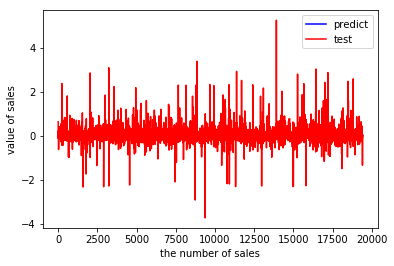

In [71]:
# use RMES
print (type(Y_pred),type(Y_test)) 
print (len(Y_pred),len(Y_test))  
print (Y_pred.shape,Y_test.shape)  
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(Y_pred)):  
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/50)  
# calculate RMSE by hand  
print("RMSE by hand:",sum_erro)

# make ROC graph
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")  
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')  
plt.show()

In [73]:
#R-squared score of this model
train_pred=linreg.predict(X_train)  
from sklearn.metrics import*
r2_score(Y_train,train_pred)
test_pred=linreg.predict(X_test)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,test_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,test_pred))
#Median absolute error
print(median_absolute_error(Y_test,test_pred))

7.19349318458
0.0324171924837
0.0337607944058


0    0.025595
1    0.055619
2    0.005383
3   -0.103410
4    0.006940
Name: logerror, dtype: float64
(58209, 10)
(58209,)
(19404, 10)
(19404,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ -2.32440622e-06  -4.03539891e-09   7.36041928e-06  -2.35780756e-05
   1.46219382e-05   7.18252561e-03  -3.36288515e-08   5.17402267e-04
  -5.96146298e-03  -2.90821366e-03]
0.19529167042
[ 0.00437467  0.02551243  0.00839159 ...,  0.01749454  0.01680324
  0.02251132]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
19404 19404
(19404,) (19404,)
RMSE by hand: 3.54776251616


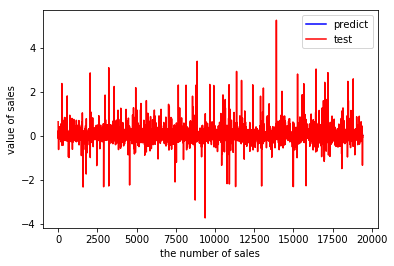

7.19312852907
0.0324330521312
0.0337311942443


In [75]:
#1.取消taxdelinquencyyear
feature_cols=['regionidcounty','latitude','garagetotalsqft','finishedsquarefeet15','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = rawdataspecificrows[feature_cols] 

X.head(5)
Y = rawdataspecificrows.logerror
print(Y.head(5))

from sklearn.cross_validation import train_test_split  
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)  
print (X_train.shape)  
print (Y_train.shape)  
print (X_test.shape)  
print (Y_test.shape)

from sklearn.linear_model import LinearRegression   
linreg = LinearRegression()  
model=linreg.fit(X_train, Y_train) 
print(model)
print(linreg.coef_)
print(linreg.intercept_)

Y_pred = linreg.predict(X_test)  
print(Y_pred) 
print (type(Y_pred))

# use RMES
print (type(Y_pred),type(Y_test)) 
print (len(Y_pred),len(Y_test))  
print (Y_pred.shape,Y_test.shape)  
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(Y_pred)):  
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/50)  
# calculate RMSE by hand  
print("RMSE by hand:",sum_erro)

# make ROC graph
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")  
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')  
plt.show()

#R-squared score of this model
train_pred=linreg.predict(X_train)  
from sklearn.metrics import*
r2_score(Y_train,train_pred)
test_pred=linreg.predict(X_test)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,test_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,test_pred))
#Median absolute error
print(median_absolute_error(Y_test,test_pred))

0    0.025595
1    0.055619
2    0.005383
3   -0.103410
4    0.006940
Name: logerror, dtype: float64
(58209, 10)
(58209,)
(19404, 10)
(19404,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ -6.49759741e-03  -7.50342107e-09   7.26254728e-06  -2.36177479e-05
   1.47389540e-05   1.17271946e-02  -3.41099691e-08   5.86294980e-04
  -6.48530337e-03  -7.00484156e-03]
0.398583520523
[ 0.00395519  0.0252128   0.00900881 ...,  0.01714681  0.01563467
  0.02275534]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
19404 19404
(19404,) (19404,)
RMSE by hand: 3.54657043925


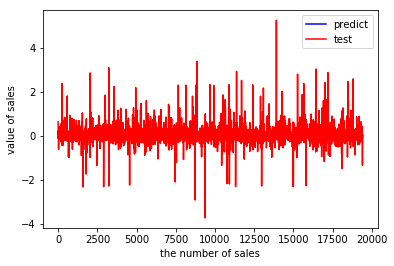

7.1872907324
0.0324112602571
0.0334545105186


In [76]:
#2.取消 regionidcounty
feature_cols=['taxdelinquencyyear','latitude','garagetotalsqft','finishedsquarefeet15','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = rawdataspecificrows[feature_cols] 

X.head(5)
Y = rawdataspecificrows.logerror
print(Y.head(5))

from sklearn.cross_validation import train_test_split  
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)  
print (X_train.shape)  
print (Y_train.shape)  
print (X_test.shape)  
print (Y_test.shape)

from sklearn.linear_model import LinearRegression   
linreg = LinearRegression()  
model=linreg.fit(X_train, Y_train) 
print(model)
print(linreg.coef_)
print(linreg.intercept_)

Y_pred = linreg.predict(X_test)  
print(Y_pred) 
print (type(Y_pred))

# use RMES
print (type(Y_pred),type(Y_test)) 
print (len(Y_pred),len(Y_test))  
print (Y_pred.shape,Y_test.shape)  
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(Y_pred)):  
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/50)  
# calculate RMSE by hand  
print("RMSE by hand:",sum_erro)

# make ROC graph
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")  
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')  
plt.show()

#R-squared score of this model
train_pred=linreg.predict(X_train)  
from sklearn.metrics import*
r2_score(Y_train,train_pred)
test_pred=linreg.predict(X_test)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,test_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,test_pred))
#Median absolute error
print(median_absolute_error(Y_test,test_pred))

0    0.025595
1    0.055619
2    0.005383
3   -0.103410
4    0.006940
Name: logerror, dtype: float64
(58209, 10)
(58209,)
(19404, 10)
(19404,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ -6.48927039e-03  -3.14859886e-06   7.29652625e-06  -2.34511141e-05
   1.45860726e-05   6.83075097e-03  -3.32182557e-08   4.40123618e-04
  -5.79620981e-03  -2.73052374e-03]
0.151551987277
[ 0.00558465  0.02698097  0.00850731 ...,  0.01863634  0.01897992
  0.02307254]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
19404 19404
(19404,) (19404,)
RMSE by hand: 3.54707233125


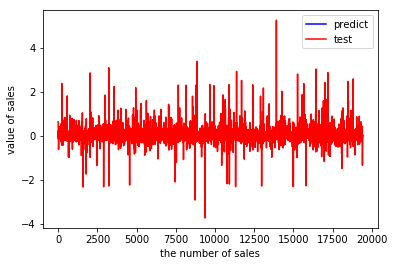

7.19546619107
0.0324204342484
0.03382947361


In [77]:
#3.取消 latitude
feature_cols=['taxdelinquencyyear','regionidcounty','garagetotalsqft','finishedsquarefeet15','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = rawdataspecificrows[feature_cols] 

X.head(5)
Y = rawdataspecificrows.logerror
print(Y.head(5))

from sklearn.cross_validation import train_test_split  
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)  
print (X_train.shape)  
print (Y_train.shape)  
print (X_test.shape)  
print (Y_test.shape)

from sklearn.linear_model import LinearRegression   
linreg = LinearRegression()  
model=linreg.fit(X_train, Y_train) 
print(model)
print(linreg.coef_)
print(linreg.intercept_)

Y_pred = linreg.predict(X_test)  
print(Y_pred) 
print (type(Y_pred))

# use RMES
print (type(Y_pred),type(Y_test)) 
print (len(Y_pred),len(Y_test))  
print (Y_pred.shape,Y_test.shape)  
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(Y_pred)):  
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/50)  
# calculate RMSE by hand  
print("RMSE by hand:",sum_erro)

# make ROC graph
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")  
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')  
plt.show()

#R-squared score of this model
train_pred=linreg.predict(X_train)  
from sklearn.metrics import*
r2_score(Y_train,train_pred)
test_pred=linreg.predict(X_test)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,test_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,test_pred))
#Median absolute error
print(median_absolute_error(Y_test,test_pred))

0    0.025595
1    0.055619
2    0.005383
3   -0.103410
4    0.006940
Name: logerror, dtype: float64
(58209, 10)
(58209,)
(19404, 10)
(19404,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ -6.55784147e-03  -2.49802293e-06  -3.64434282e-09   1.19503248e-05
   1.12971778e-05   8.95402636e-03  -2.83210469e-08   4.03078561e-04
  -5.70633410e-03  -4.08183211e-03]
0.220927909722
[ 0.00657075  0.02518868  0.00915802 ...,  0.01684169  0.01593589
  0.02055308]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
19404 19404
(19404,) (19404,)
RMSE by hand: 3.54551026876


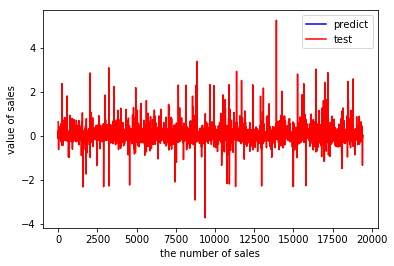

7.18664532506
0.0323918858635
0.0337257167964


In [79]:
#4.取消  finishedsquarefeet15
feature_cols=['taxdelinquencyyear','regionidcounty','latitude','garagetotalsqft','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = rawdataspecificrows[feature_cols] 

X.head(5)
Y = rawdataspecificrows.logerror
print(Y.head(5))

from sklearn.cross_validation import train_test_split  
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)  
print (X_train.shape)  
print (Y_train.shape)  
print (X_test.shape)  
print (Y_test.shape)

from sklearn.linear_model import LinearRegression   
linreg = LinearRegression()  
model=linreg.fit(X_train, Y_train) 
print(model)
print(linreg.coef_)
print(linreg.intercept_)

Y_pred = linreg.predict(X_test)  
print(Y_pred) 
print (type(Y_pred))

# use RMES
print (type(Y_pred),type(Y_test)) 
print (len(Y_pred),len(Y_test))  
print (Y_pred.shape,Y_test.shape)  
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(Y_pred)):  
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/50)  
# calculate RMSE by hand  
print("RMSE by hand:",sum_erro)

# make ROC graph
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")  
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')  
plt.show()

#R-squared score of this model
train_pred=linreg.predict(X_train)  
from sklearn.metrics import*
r2_score(Y_train,train_pred)
test_pred=linreg.predict(X_test)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,test_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,test_pred))
#Median absolute error
print(median_absolute_error(Y_test,test_pred))

0    0.025595
1    0.055619
2    0.005383
3   -0.103410
4    0.006940
Name: logerror, dtype: float64
(58209, 10)
(58209,)
(19404, 10)
(19404,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ -6.49806676e-03  -2.30698637e-06  -4.05029557e-09  -2.40200382e-05
   1.51399803e-05   6.54312106e-03  -3.36650787e-08   6.84096836e-04
  -5.76695750e-03  -2.69294338e-03]
0.290046032002
[ 0.00384885  0.02492177  0.00823799 ...,  0.01772652  0.01709778
  0.02295836]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
19404 19404
(19404,) (19404,)
RMSE by hand: 3.54676990973


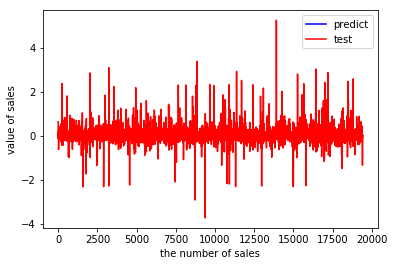

7.1924112891
0.0324149061858
0.0336535911676


In [80]:
#5.取消 garagetotalsqft
feature_cols=['taxdelinquencyyear','regionidcounty','latitude','finishedsquarefeet15','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = rawdataspecificrows[feature_cols] 

X.head(5)
Y = rawdataspecificrows.logerror
print(Y.head(5))

from sklearn.cross_validation import train_test_split  
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)  
print (X_train.shape)  
print (Y_train.shape)  
print (X_test.shape)  
print (Y_test.shape)

from sklearn.linear_model import LinearRegression   
linreg = LinearRegression()  
model=linreg.fit(X_train, Y_train) 
print(model)
print(linreg.coef_)
print(linreg.intercept_)

Y_pred = linreg.predict(X_test)  
print(Y_pred) 
print (type(Y_pred))

# use RMES
print (type(Y_pred),type(Y_test)) 
print (len(Y_pred),len(Y_test))  
print (Y_pred.shape,Y_test.shape)  
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(Y_pred)):  
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/50)  
# calculate RMSE by hand  
print("RMSE by hand:",sum_erro)

# make ROC graph
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")  
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')  
plt.show()

#R-squared score of this model
train_pred=linreg.predict(X_train)  
from sklearn.metrics import*
r2_score(Y_train,train_pred)
test_pred=linreg.predict(X_test)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,test_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,test_pred))
#Median absolute error
print(median_absolute_error(Y_test,test_pred))

0    0.025595
1    0.055619
2    0.005383
3   -0.103410
4    0.006940
Name: logerror, dtype: float64
(58209, 10)
(58209,)
(19404, 10)
(19404,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ -6.51632922e-03  -2.80648965e-06  -3.66372753e-09  -1.60197955e-05
   1.81956579e-05   2.20417563e-02  -1.28981894e-08   3.52351874e-03
  -1.27476003e-02  -5.31733508e-03]
0.25367554185
[ 0.0096721   0.02149816  0.00564896 ...,  0.01879563  0.01515876
  0.01660294]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
19404 19404
(19404,) (19404,)
RMSE by hand: 3.54634034726


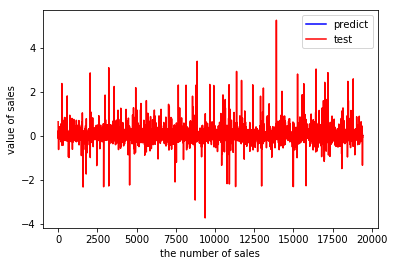

7.20908695229
0.0324070548819
0.0338195976591


In [81]:
#6.取消 calculatedfinishedsquarefeet
feature_cols=['taxdelinquencyyear','regionidcounty','latitude','finishedsquarefeet15','garagetotalsqft','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = rawdataspecificrows[feature_cols] 

X.head(5)
Y = rawdataspecificrows.logerror
print(Y.head(5))

from sklearn.cross_validation import train_test_split  
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)  
print (X_train.shape)  
print (Y_train.shape)  
print (X_test.shape)  
print (Y_test.shape)

from sklearn.linear_model import LinearRegression   
linreg = LinearRegression()  
model=linreg.fit(X_train, Y_train) 
print(model)
print(linreg.coef_)
print(linreg.intercept_)

Y_pred = linreg.predict(X_test)  
print(Y_pred) 
print (type(Y_pred))

# use RMES
print (type(Y_pred),type(Y_test)) 
print (len(Y_pred),len(Y_test))  
print (Y_pred.shape,Y_test.shape)  
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(Y_pred)):  
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/50)  
# calculate RMSE by hand  
print("RMSE by hand:",sum_erro)

# make ROC graph
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")  
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')  
plt.show()

#R-squared score of this model
train_pred=linreg.predict(X_train)  
from sklearn.metrics import*
r2_score(Y_train,train_pred)
test_pred=linreg.predict(X_test)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,test_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,test_pred))
#Median absolute error
print(median_absolute_error(Y_test,test_pred))

0    0.025595
1    0.055619
2    0.005383
3   -0.103410
4    0.006940
Name: logerror, dtype: float64
(58209, 10)
(58209,)
(19404, 10)
(19404,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ -6.49638523e-03  -2.85787923e-06  -3.91588808e-09  -2.36372005e-05
   6.94033296e-06   1.50691236e-05  -3.35050610e-08   3.29575194e-04
  -3.38448221e-03   1.50927416e-03]
0.284921368767
[ 0.00431761  0.0240936   0.00862156 ...,  0.01746302  0.01683458
  0.02262179]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
19404 19404
(19404,) (19404,)
RMSE by hand: 3.54708789218


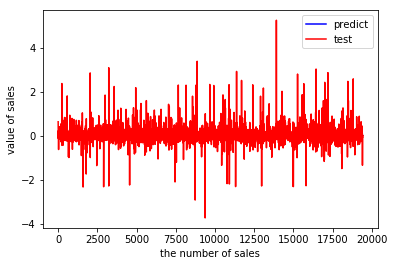

7.1931776156
0.0324207187046
0.0336982534534


In [82]:
#7.取消  calculatedbathnbr
feature_cols=['taxdelinquencyyear','regionidcounty','latitude','finishedsquarefeet15','garagetotalsqft','calculatedfinishedsquarefeet','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = rawdataspecificrows[feature_cols] 

X.head(5)
Y = rawdataspecificrows.logerror
print(Y.head(5))

from sklearn.cross_validation import train_test_split  
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)  
print (X_train.shape)  
print (Y_train.shape)  
print (X_test.shape)  
print (Y_test.shape)

from sklearn.linear_model import LinearRegression   
linreg = LinearRegression()  
model=linreg.fit(X_train, Y_train) 
print(model)
print(linreg.coef_)
print(linreg.intercept_)

Y_pred = linreg.predict(X_test)  
print(Y_pred) 
print (type(Y_pred))

# use RMES
print (type(Y_pred),type(Y_test)) 
print (len(Y_pred),len(Y_test))  
print (Y_pred.shape,Y_test.shape)  
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(Y_pred)):  
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/50)  
# calculate RMSE by hand  
print("RMSE by hand:",sum_erro)

# make ROC graph
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")  
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')  
plt.show()

#R-squared score of this model
train_pred=linreg.predict(X_train)  
from sklearn.metrics import*
r2_score(Y_train,train_pred)
test_pred=linreg.predict(X_test)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,test_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,test_pred))
#Median absolute error
print(median_absolute_error(Y_test,test_pred))

0    0.025595
1    0.055619
2    0.005383
3   -0.103410
4    0.006940
Name: logerror, dtype: float64
(58209, 10)
(58209,)
(19404, 10)
(19404,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ -6.60642027e-03  -3.08566932e-06  -2.88106763e-09  -1.99290108e-05
   8.61544039e-06   8.27088374e-06   7.58647978e-03   2.32668914e-03
  -8.37793257e-03  -2.10701206e-03]
0.24426959792
[ 0.00498464  0.02257944  0.01094594 ...,  0.01720931  0.01669073
  0.02017782]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
19404 19404
(19404,) (19404,)
RMSE by hand: 3.54607641595


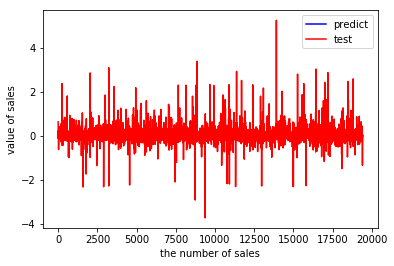

7.18619630645
0.032402231364
0.0336195263054


In [99]:
#8.取消   structuretaxvaluedollarcnt
feature_cols=['taxdelinquencyyear','regionidcounty','latitude','finishedsquarefeet15','garagetotalsqft','calculatedfinishedsquarefeet','calculatedbathnbr','bedroomcnt','bathroomcnt','fullbathcnt']
X = rawdataspecificrows[feature_cols] 

X.head(5)
Y = rawdataspecificrows.logerror
print(Y.head(5))

from sklearn.cross_validation import train_test_split  
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)  
print (X_train.shape)  
print (Y_train.shape)  
print (X_test.shape)  
print (Y_test.shape)

from sklearn.linear_model import LinearRegression   
linreg = LinearRegression()  
model=linreg.fit(X_train, Y_train) 
print(model)
print(linreg.coef_)
print(linreg.intercept_)

Y_pred = linreg.predict(X_test)  
print(Y_pred) 
print (type(Y_pred))

# use RMES
print (type(Y_pred),type(Y_test)) 
print (len(Y_pred),len(Y_test))  
print (Y_pred.shape,Y_test.shape)  
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(Y_pred)):  
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/50)  
# calculate RMSE by hand  
print("RMSE by hand:",sum_erro)

# make ROC graph
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")  
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')  
plt.show()

#R-squared score of this model
train_pred=linreg.predict(X_train)  
from sklearn.metrics import*
r2_score(Y_train,train_pred)
test_pred=linreg.predict(X_test)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,test_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,test_pred))
#Median absolute error
print(median_absolute_error(Y_test,test_pred))

0    0.025595
1    0.055619
2    0.005383
3   -0.103410
4    0.006940
Name: logerror, dtype: float64
(58209, 10)
(58209,)
(19404, 10)
(19404,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ -6.49638523e-03  -2.85787923e-06  -3.91588808e-09  -2.36372005e-05
   6.94033296e-06   1.50691236e-05  -3.35050610e-08   3.29575194e-04
  -3.38448221e-03   1.50927416e-03]
0.284921368767
[ 0.00431761  0.0240936   0.00862156 ...,  0.01746302  0.01683458
  0.02262179]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
19404 19404
(19404,) (19404,)
RMSE by hand: 3.54708789218


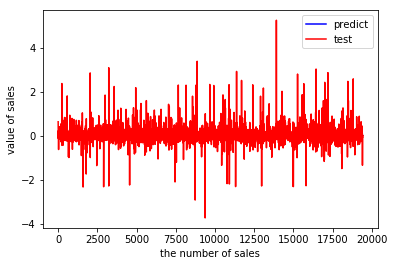

7.1931776156
0.0324207187046
0.0336982534534


In [102]:
#9.取消   calculatedbathnbr
feature_cols=['taxdelinquencyyear','regionidcounty','latitude','finishedsquarefeet15','garagetotalsqft','calculatedfinishedsquarefeet','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = rawdataspecificrows[feature_cols] 

X.head(5)
Y = rawdataspecificrows.logerror
print(Y.head(5))

from sklearn.cross_validation import train_test_split  
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)  
print (X_train.shape)  
print (Y_train.shape)  
print (X_test.shape)  
print (Y_test.shape)

from sklearn.linear_model import LinearRegression   
linreg = LinearRegression()  
model=linreg.fit(X_train, Y_train) 
print(model)
print(linreg.coef_)
print(linreg.intercept_)

Y_pred = linreg.predict(X_test)  
print(Y_pred) 
print (type(Y_pred))

# use RMES
print (type(Y_pred),type(Y_test)) 
print (len(Y_pred),len(Y_test))  
print (Y_pred.shape,Y_test.shape)  
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(Y_pred)):  
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/50)  
# calculate RMSE by hand  
print("RMSE by hand:",sum_erro)

# make ROC graph
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")  
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')  
plt.show()

#R-squared score of this model
train_pred=linreg.predict(X_train)  
from sklearn.metrics import*
r2_score(Y_train,train_pred)
test_pred=linreg.predict(X_test)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,test_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,test_pred))
#Median absolute error
print(median_absolute_error(Y_test,test_pred))

0    0.025595
1    0.055619
2    0.005383
3   -0.103410
4    0.006940
Name: logerror, dtype: float64
(58209, 9)
(58209,)
(19404, 9)
(19404,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ -6.49599709e-03  -2.47549187e-06  -3.88035245e-09  -2.34689682e-05
   7.04949226e-06   1.51402601e-05  -3.40827763e-08   7.71243787e-04
  -2.40697268e-03]
0.282540909998
[ 0.00461979  0.02578928  0.00864583 ...,  0.01735505  0.01653169
  0.02232428]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
19404 19404
(19404,) (19404,)
RMSE by hand: 3.54738300393


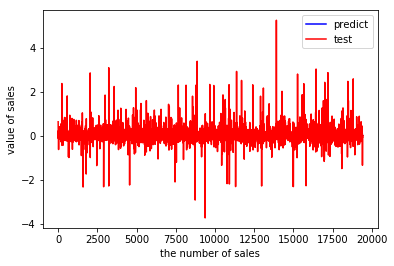

7.19273901142
0.0324261136274
0.0337149258265


In [101]:
#10.取消    bathroomcnt
feature_cols=['taxdelinquencyyear','regionidcounty','latitude','finishedsquarefeet15','garagetotalsqft','calculatedfinishedsquarefeet','structuretaxvaluedollarcnt','calculatedbathnbr','fullbathcnt']
X = rawdataspecificrows[feature_cols] 

X.head(5)
Y = rawdataspecificrows.logerror
print(Y.head(5))

from sklearn.cross_validation import train_test_split  
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)  
print (X_train.shape)  
print (Y_train.shape)  
print (X_test.shape)  
print (Y_test.shape)

from sklearn.linear_model import LinearRegression   
linreg = LinearRegression()  
model=linreg.fit(X_train, Y_train) 
print(model)
print(linreg.coef_)
print(linreg.intercept_)

Y_pred = linreg.predict(X_test)  
print(Y_pred) 
print (type(Y_pred))

# use RMES
print (type(Y_pred),type(Y_test)) 
print (len(Y_pred),len(Y_test))  
print (Y_pred.shape,Y_test.shape)  
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(Y_pred)):  
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/50)  
# calculate RMSE by hand  
print("RMSE by hand:",sum_erro)

# make ROC graph
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")  
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')  
plt.show()

#R-squared score of this model
train_pred=linreg.predict(X_train)  
from sklearn.metrics import*
r2_score(Y_train,train_pred)
test_pred=linreg.predict(X_test)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,test_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,test_pred))
#Median absolute error
print(median_absolute_error(Y_test,test_pred))

0    0.025595
1    0.055619
2    0.005383
3   -0.103410
4    0.006940
Name: logerror, dtype: float64
(58209, 10)
(58209,)
(19404, 10)
(19404,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ -6.49513504e-03  -2.64607142e-06  -4.01970636e-09  -2.35679377e-05
   7.24080006e-06   1.46621557e-05  -3.34090822e-08   4.18097096e-03
   4.90563102e-04  -5.82094166e-03]
0.287155765663
[ 0.00435406  0.02443449  0.00834863 ...,  0.01755006  0.0167806
  0.02249405]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
19404 19404
(19404,) (19404,)
RMSE by hand: 3.54688883568


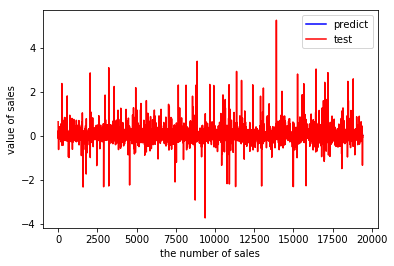

7.19329654148
0.0324170800162
0.033740313103


In [85]:
#10.取消     fullbathcnt
feature_cols=['taxdelinquencyyear','regionidcounty','latitude','finishedsquarefeet15','garagetotalsqft','calculatedfinishedsquarefeet','structuretaxvaluedollarcnt','calculatedbathnbr','bedroomcnt','bathroomcnt']
X = rawdataspecificrows[feature_cols] 

X.head(5)
Y = rawdataspecificrows.logerror
print(Y.head(5))

from sklearn.cross_validation import train_test_split  
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)  
print (X_train.shape)  
print (Y_train.shape)  
print (X_test.shape)  
print (Y_test.shape)

from sklearn.linear_model import LinearRegression   
linreg = LinearRegression()  
model=linreg.fit(X_train, Y_train) 
print(model)
print(linreg.coef_)
print(linreg.intercept_)

Y_pred = linreg.predict(X_test)  
print(Y_pred) 
print (type(Y_pred))

# use RMES
print (type(Y_pred),type(Y_test)) 
print (len(Y_pred),len(Y_test))  
print (Y_pred.shape,Y_test.shape)  
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(Y_pred)):  
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/50)  
# calculate RMSE by hand  
print("RMSE by hand:",sum_erro)

# make ROC graph
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")  
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')  
plt.show()

#R-squared score of this model
train_pred=linreg.predict(X_train)  
from sklearn.metrics import*
r2_score(Y_train,train_pred)
test_pred=linreg.predict(X_test)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,test_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,test_pred))
#Median absolute error
print(median_absolute_error(Y_test,test_pred))

In [ ]:
#10.取消     fullbathcnt
feature_cols=['taxdelinquencyyear','regionidcounty','latitude','finishedsquarefeet15','garagetotalsqft','calculatedfinishedsquarefeet','structuretaxvaluedollarcnt','calculatedbathnbr','bedroomcnt','bathroomcnt']
X = rawdataspecificrows[feature_cols] 

X.head(5)
Y = rawdataspecificrows.logerror
print(Y.head(5))

from sklearn.cross_validation import train_test_split  
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)  
print (X_train.shape)  
print (Y_train.shape)  
print (X_test.shape)  
print (Y_test.shape)

from sklearn.linear_model import LinearRegression   
linreg = LinearRegression()  
model=linreg.fit(X_train, Y_train) 
print(model)
print(linreg.coef_)
print(linreg.intercept_)

Y_pred = linreg.predict(X_test)  
print(Y_pred) 
print (type(Y_pred))

# use RMES
print (type(Y_pred),type(Y_test)) 
print (len(Y_pred),len(Y_test))  
print (Y_pred.shape,Y_test.shape)  
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(Y_pred)):  
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/50)  
# calculate RMSE by hand  
print("RMSE by hand:",sum_erro)

# make ROC graph
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")  
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')  
plt.show()

#R-squared score of this model
train_pred=linreg.predict(X_train)  
from sklearn.metrics import*
r2_score(Y_train,train_pred)
test_pred=linreg.predict(X_test)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,test_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,test_pred))
#Median absolute error
print(median_absolute_error(Y_test,test_pred))

In [ ]:
#结论:需要取消calculatedfinishedsquarefeet，calculatedbathnbr，structuretaxvaluedollarcnt，bedroomcnt，bathroomcnt，fullbathcnt
feature_cols=['taxdelinquencyyear','regionidcounty','latitude','garagetotalsqft','finishedsquarefeet15','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = rawdataspecificrows[feature_cols]
X.head(5)
Y = rawdataspecificrows.logerror
print(Y.head(5))

from sklearn.cross_validation import train_test_split  
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)  
print (X_train.shape)  
print (Y_train.shape)  
print (X_test.shape)  
print (Y_test.shape)

from sklearn.linear_model import LinearRegression   
linreg = LinearRegression()  
model=linreg.fit(X_train, Y_train) 
print(model)
print(linreg.coef_)
print(linreg.intercept_)

Y_pred = linreg.predict(X_test)  
print(Y_pred) 
print (type(Y_pred))

# use RMES
print (type(Y_pred),type(Y_test)) 
print (len(Y_pred),len(Y_test))  
print (Y_pred.shape,Y_test.shape)  
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(Y_pred)):  
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/50)  
# calculate RMSE by hand  
print("RMSE by hand:",sum_erro)

# make ROC graph
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")  
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')  
plt.show()

#R-squared score of this model
train_pred=linreg.predict(X_train)  
from sklearn.metrics import*
r2_score(Y_train,train_pred)
test_pred=linreg.predict(X_test)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,test_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,test_pred))
#Median absolute error
print(median_absolute_error(Y_test,test_pred))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


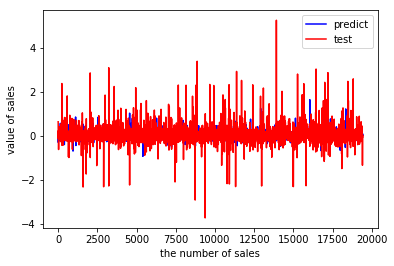

RMSE by hand: 3.79878650194
8.84018561648
0.0371850620679
0.0456425037024


In [86]:
#Use Random Forest 

#test 11 features

import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score

df = pd.read_csv('midterm_2017.csv')
df.index = df['parcelid'].tolist()

column=['taxdelinquencyyear','regionidcounty','latitude','garagetotalsqft','finishedsquarefeet15','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = df[column]
#X =array[:,1]
Y = df['logerror']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  random_state=1)


#print (Y_test.head(2))
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
model=regressor.fit(X_train, Y_train)
print(model)
from sklearn.metrics import accuracy_score
Y_pred = regressor.predict(X_test)
#print(accuracy_score(Y_test, Y_pred))


# make ROC graph
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

# use RMES
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(Y_pred)):
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print("RMSE by hand:",sum_erro)


#R-squared score of this model
train_pred=regressor.predict(X_train)
from sklearn.metrics import*
r2_score(Y_train,train_pred)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,Y_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,Y_pred))
#Median absolute error
print(median_absolute_error(Y_test,Y_pred))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


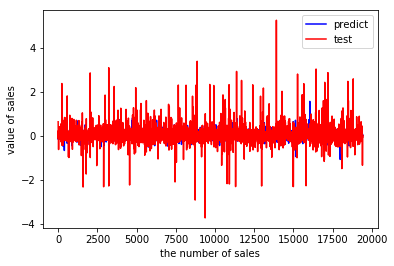

RMSE by hand: 3.78620017559
8.87341140454
0.0369390635168
0.045931499296


In [88]:
#Use Random Forest 

#1.取消taxdelinquencyyear

import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score

df = pd.read_csv('midterm_2017.csv')
df.index = df['parcelid'].tolist()

column=['regionidcounty','latitude','garagetotalsqft','finishedsquarefeet15','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = df[column]
#X =array[:,1]
Y = df['logerror']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  random_state=1)


#print (Y_test.head(2))
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
model=regressor.fit(X_train, Y_train)
print(model)
from sklearn.metrics import accuracy_score
Y_pred = regressor.predict(X_test)
#print(accuracy_score(Y_test, Y_pred))


# make ROC graph
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

# use RMES
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(Y_pred)):
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print("RMSE by hand:",sum_erro)


#R-squared score of this model
train_pred=regressor.predict(X_train)
from sklearn.metrics import*
r2_score(Y_train,train_pred)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,Y_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,Y_pred))
#Median absolute error
print(median_absolute_error(Y_test,Y_pred))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


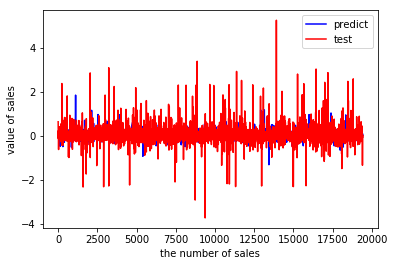

RMSE by hand: 3.81211043775
8.93015277498
0.0374463667017
0.0463536341287


In [89]:
#Use Random Forest 

#2.取消 regionidcounty

import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score

df = pd.read_csv('midterm_2017.csv')
df.index = df['parcelid'].tolist()

column=['taxdelinquencyyear','latitude','garagetotalsqft','finishedsquarefeet15','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = df[column]
#X =array[:,1]
Y = df['logerror']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  random_state=1)


#print (Y_test.head(2))
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
model=regressor.fit(X_train, Y_train)
print(model)
from sklearn.metrics import accuracy_score
Y_pred = regressor.predict(X_test)
#print(accuracy_score(Y_test, Y_pred))


# make ROC graph
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

# use RMES
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(Y_pred)):
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print("RMSE by hand:",sum_erro)


#R-squared score of this model
train_pred=regressor.predict(X_train)
from sklearn.metrics import*
r2_score(Y_train,train_pred)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,Y_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,Y_pred))
#Median absolute error
print(median_absolute_error(Y_test,Y_pred))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


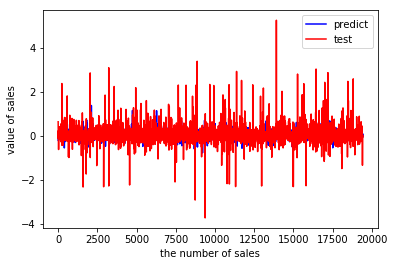

RMSE by hand: 3.84606921998
9.12499630651
0.0381164925915
0.0479343730357


In [90]:
#Use Random Forest 

#3.取消  latitude

import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score

df = pd.read_csv('midterm_2017.csv')
df.index = df['parcelid'].tolist()

column=['taxdelinquencyyear','regionidcounty','garagetotalsqft','finishedsquarefeet15','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = df[column]
#X =array[:,1]
Y = df['logerror']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  random_state=1)


#print (Y_test.head(2))
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
model=regressor.fit(X_train, Y_train)
print(model)
from sklearn.metrics import accuracy_score
Y_pred = regressor.predict(X_test)
#print(accuracy_score(Y_test, Y_pred))


# make ROC graph
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

# use RMES
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(Y_pred)):
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print("RMSE by hand:",sum_erro)


#R-squared score of this model
train_pred=regressor.predict(X_train)
from sklearn.metrics import*
r2_score(Y_train,train_pred)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,Y_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,Y_pred))
#Median absolute error
print(median_absolute_error(Y_test,Y_pred))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


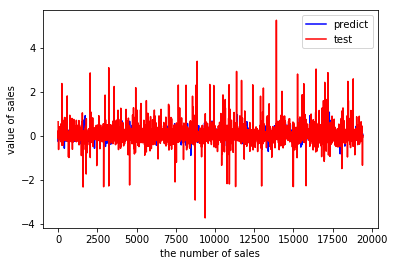

RMSE by hand: 3.76174221253
8.81246687727
0.0364633695978
0.0458476736308


In [91]:
#Use Random Forest 

#4.取消   garagetotalsqft

import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score

df = pd.read_csv('midterm_2017.csv')
df.index = df['parcelid'].tolist()

column=['taxdelinquencyyear','regionidcounty','latitude','finishedsquarefeet15','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = df[column]
#X =array[:,1]
Y = df['logerror']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  random_state=1)


#print (Y_test.head(2))
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
model=regressor.fit(X_train, Y_train)
print(model)
from sklearn.metrics import accuracy_score
Y_pred = regressor.predict(X_test)
#print(accuracy_score(Y_test, Y_pred))


# make ROC graph
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

# use RMES
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(Y_pred)):
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print("RMSE by hand:",sum_erro)


#R-squared score of this model
train_pred=regressor.predict(X_train)
from sklearn.metrics import*
r2_score(Y_train,train_pred)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,Y_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,Y_pred))
#Median absolute error
print(median_absolute_error(Y_test,Y_pred))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


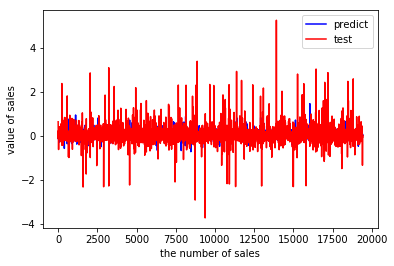

RMSE by hand: 3.79247865098
8.92146809675
0.0370616736707
0.0463097512754


In [92]:
#Use Random Forest 

#5.取消    finishedsquarefeet15

import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score

df = pd.read_csv('midterm_2017.csv')
df.index = df['parcelid'].tolist()

column=['taxdelinquencyyear','regionidcounty','latitude','garagetotalsqft','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = df[column]
#X =array[:,1]
Y = df['logerror']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  random_state=1)


#print (Y_test.head(2))
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
model=regressor.fit(X_train, Y_train)
print(model)
from sklearn.metrics import accuracy_score
Y_pred = regressor.predict(X_test)
#print(accuracy_score(Y_test, Y_pred))


# make ROC graph
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

# use RMES
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(Y_pred)):
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print("RMSE by hand:",sum_erro)


#R-squared score of this model
train_pred=regressor.predict(X_train)
from sklearn.metrics import*
r2_score(Y_train,train_pred)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,Y_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,Y_pred))
#Median absolute error
print(median_absolute_error(Y_test,Y_pred))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


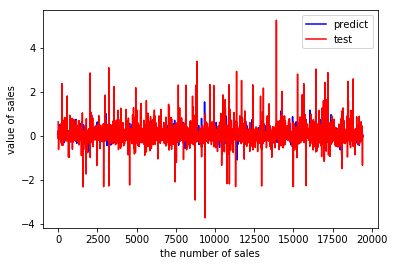

RMSE by hand: 3.84212848068
9.059104715
0.0380384231655
0.0460643640165


In [93]:
#Use Random Forest 

#6.取消    calculatedfinishedsquarefeet

import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score

df = pd.read_csv('midterm_2017.csv')
df.index = df['parcelid'].tolist()

column=['taxdelinquencyyear','regionidcounty','latitude','garagetotalsqft','finishedsquarefeet15','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = df[column]
#X =array[:,1]
Y = df['logerror']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  random_state=1)


#print (Y_test.head(2))
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
model=regressor.fit(X_train, Y_train)
print(model)
from sklearn.metrics import accuracy_score
Y_pred = regressor.predict(X_test)
#print(accuracy_score(Y_test, Y_pred))


# make ROC graph
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

# use RMES
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(Y_pred)):
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print("RMSE by hand:",sum_erro)


#R-squared score of this model
train_pred=regressor.predict(X_train)
from sklearn.metrics import*
r2_score(Y_train,train_pred)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,Y_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,Y_pred))
#Median absolute error
print(median_absolute_error(Y_test,Y_pred))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


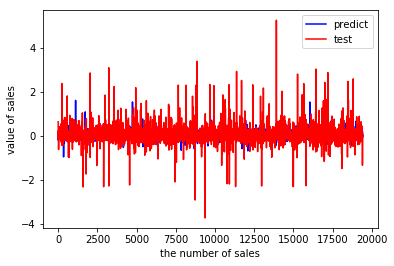

RMSE by hand: 3.81588499827
8.92803855472
0.0375205584416
0.0465242306428


In [94]:
#Use Random Forest 

#7.取消    calculatedbathnbr

import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score

df = pd.read_csv('midterm_2017.csv')
df.index = df['parcelid'].tolist()

column=['taxdelinquencyyear','regionidcounty','latitude','garagetotalsqft','finishedsquarefeet15','calculatedfinishedsquarefeet','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = df[column]
#X =array[:,1]
Y = df['logerror']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  random_state=1)


#print (Y_test.head(2))
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
model=regressor.fit(X_train, Y_train)
print(model)
from sklearn.metrics import accuracy_score
Y_pred = regressor.predict(X_test)
#print(accuracy_score(Y_test, Y_pred))


# make ROC graph
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

# use RMES
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(Y_pred)):
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print("RMSE by hand:",sum_erro)


#R-squared score of this model
train_pred=regressor.predict(X_train)
from sklearn.metrics import*
r2_score(Y_train,train_pred)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,Y_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,Y_pred))
#Median absolute error
print(median_absolute_error(Y_test,Y_pred))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


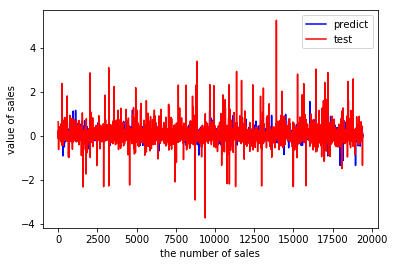

RMSE by hand: 3.84274899785
9.07793966867
0.0380507108341
0.0472827883685


In [95]:
#Use Random Forest 

#8.取消    structuretaxvaluedollarcnt

import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score

df = pd.read_csv('midterm_2017.csv')
df.index = df['parcelid'].tolist()

column=['taxdelinquencyyear','regionidcounty','latitude','garagetotalsqft','finishedsquarefeet15','calculatedfinishedsquarefeet','calculatedbathnbr','bedroomcnt','bathroomcnt','fullbathcnt']
X = df[column]
#X =array[:,1]
Y = df['logerror']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  random_state=1)


#print (Y_test.head(2))
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
model=regressor.fit(X_train, Y_train)
print(model)
from sklearn.metrics import accuracy_score
Y_pred = regressor.predict(X_test)
#print(accuracy_score(Y_test, Y_pred))


# make ROC graph
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

# use RMES
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(Y_pred)):
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print("RMSE by hand:",sum_erro)


#R-squared score of this model
train_pred=regressor.predict(X_train)
from sklearn.metrics import*
r2_score(Y_train,train_pred)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,Y_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,Y_pred))
#Median absolute error
print(median_absolute_error(Y_test,Y_pred))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


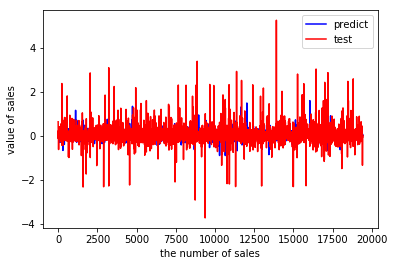

RMSE by hand: 3.82530145363
8.93176676583
0.0377059658089
0.0459542288269


In [96]:
#Use Random Forest 

#9.取消     bedroomcnt

import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score

df = pd.read_csv('midterm_2017.csv')
df.index = df['parcelid'].tolist()

column=['taxdelinquencyyear','regionidcounty','latitude','garagetotalsqft','finishedsquarefeet15','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bathroomcnt','fullbathcnt']
X = df[column]
#X =array[:,1]
Y = df['logerror']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  random_state=1)


#print (Y_test.head(2))
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
model=regressor.fit(X_train, Y_train)
print(model)
from sklearn.metrics import accuracy_score
Y_pred = regressor.predict(X_test)
#print(accuracy_score(Y_test, Y_pred))


# make ROC graph
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

# use RMES
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(Y_pred)):
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print("RMSE by hand:",sum_erro)


#R-squared score of this model
train_pred=regressor.predict(X_train)
from sklearn.metrics import*
r2_score(Y_train,train_pred)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,Y_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,Y_pred))
#Median absolute error
print(median_absolute_error(Y_test,Y_pred))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


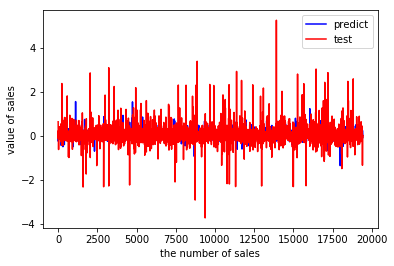

RMSE by hand: 3.82058643056
8.95848705251
0.0376130712053
0.046675474348


In [97]:
#Use Random Forest 

#10.取消      bathroomcnt

import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score

df = pd.read_csv('midterm_2017.csv')
df.index = df['parcelid'].tolist()

column=['taxdelinquencyyear','regionidcounty','latitude','garagetotalsqft','finishedsquarefeet15','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','fullbathcnt']
X = df[column]
#X =array[:,1]
Y = df['logerror']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  random_state=1)


#print (Y_test.head(2))
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
model=regressor.fit(X_train, Y_train)
print(model)
from sklearn.metrics import accuracy_score
Y_pred = regressor.predict(X_test)
#print(accuracy_score(Y_test, Y_pred))


# make ROC graph
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

# use RMES
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(Y_pred)):
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print("RMSE by hand:",sum_erro)


#R-squared score of this model
train_pred=regressor.predict(X_train)
from sklearn.metrics import*
r2_score(Y_train,train_pred)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,Y_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,Y_pred))
#Median absolute error
print(median_absolute_error(Y_test,Y_pred))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


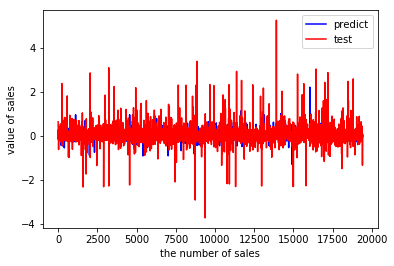

RMSE by hand: 3.80045026163
8.8549247097
0.0372176411851
0.0455669733829


In [98]:
#Use Random Forest 

#11.取消       fullbathcnt

import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score

df = pd.read_csv('midterm_2017.csv')
df.index = df['parcelid'].tolist()

column=['taxdelinquencyyear','regionidcounty','latitude','garagetotalsqft','finishedsquarefeet15','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt']
X = df[column]
#X =array[:,1]
Y = df['logerror']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  random_state=1)


#print (Y_test.head(2))
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
model=regressor.fit(X_train, Y_train)
print(model)
from sklearn.metrics import accuracy_score
Y_pred = regressor.predict(X_test)
#print(accuracy_score(Y_test, Y_pred))


# make ROC graph
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

# use RMES
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(Y_pred)):
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print("RMSE by hand:",sum_erro)


#R-squared score of this model
train_pred=regressor.predict(X_train)
from sklearn.metrics import*
r2_score(Y_train,train_pred)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,Y_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,Y_pred))
#Median absolute error
print(median_absolute_error(Y_test,Y_pred))

In [ ]:
#Use Random Forest 

#结论：

import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score

df = pd.read_csv('midterm_2017.csv')
df.index = df['parcelid'].tolist()

column=['taxdelinquencyyear','regionidcounty','latitude','garagetotalsqft','finishedsquarefeet15','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = df[column]
#X =array[:,1]
Y = df['logerror']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  random_state=1)


#print (Y_test.head(2))
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
model=regressor.fit(X_train, Y_train)
print(model)
from sklearn.metrics import accuracy_score
Y_pred = regressor.predict(X_test)
#print(accuracy_score(Y_test, Y_pred))


# make ROC graph
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

# use RMES
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(Y_pred)):
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print("RMSE by hand:",sum_erro)


#R-squared score of this model
train_pred=regressor.predict(X_train)
from sklearn.metrics import*
r2_score(Y_train,train_pred)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,Y_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,Y_pred))
#Median absolute error
print(median_absolute_error(Y_test,Y_pred))